<a id="3"></a> <br>
# 1-Problem Definition
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( **Problem Formalization**)
> **we will be predicting whether a question asked on Quora is sincere or not.**
<a id="31"></a> <br>
## 1.1 About Quora
Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.
<a id="32"></a> <br>
## 1.2 Business View 
An existential problem for any major website today is how to handle toxic and divisive content. **Quora** wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

**Quora** is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

In this kernel, I will develop models that identify and flag insincere questions.we Help Quora uphold their policy of “Be Nice, Be Respectful” and continue to be a place for sharing and growing the world’s knowledge.
<a id="321"></a> <br>
### 1.2.1 Real world Application Vs Competitions
Just a simple comparison between real-world apps with competitions:
<img src="http://s9.picofile.com/file/8339956300/reallife.png" height="600" width="500" />
<a id="33"></a> <br>
## 1.3 What is a insincere question?
Is defined as a question intended to make a **statement** rather than look for **helpful answers**.
<img src='http://s8.picofile.com/file/8342711526/Quora_moderation.png'>
<a id="34"></a> <br>
## 1.4 How can we find insincere question?
Some characteristics that can signify that a question is insincere:

1. **Has a non-neutral tone**
    1. Has an exaggerated tone to underscore a point about a group of people
    1. Is rhetorical and meant to imply a statement about a group of people
1. **Is disparaging or inflammatory**
    1. Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
    1. Makes disparaging attacks/insults against a specific person or group of people
    1. Based on an outlandish premise about a group of people
    1. Disparages against a characteristic that is not fixable and not measurable
1. **Isn't grounded in reality**
    1. Based on false information, or contains absurd assumptions
    1. Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers
   

<a id="4"></a> <br>
# 2-Problem Feature
Problem Definition has three steps that have illustrated in the picture below:

1. Aim
1. Variable
1. Inputs & Outputs





<a id="41"></a> <br>
### 2.1 Aim
We will be predicting whether a question asked on Quora is **sincere** or not.


<a id="42"></a> <br>
### 2.2 Variables

1. qid - unique question identifier
1. question_text - Quora question text
1. target - a question labeled "insincere" has a value of 1, otherwise 0

<a id="43"></a> <br>
### 2.3 Inputs & Outputs
we use train.csv and test.csv as Input and we should upload a  submission.csv as Output


**<< Note >>**
> You must answer the following question:
How does your company expect to use and benefit from **your model**.


# Importing libraries

In [0]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from wordcloud import WordCloud as wc
from nltk.corpus import stopwords #stopwords


import nltk
import json
import sys

import csv
import os

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies

import matplotlib as mpl #plotting graph
import seaborn as sns

import pandas as pd

import numpy as np
import matplotlib 

import warnings
import sklearn as sk

import string
import scipy



<a id="553"></a> <br>
## 4-NLTK stop words
Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

A module has been imported:



In [0]:
from nltk.corpus import stopwords


We get a set of English stop words using the line:



In [0]:
stopWords = set(stopwords.words('english'))


The returned list stopWords contains 153 stop words on my computer.
You can view the length or contents of this array with the lines:

In [0]:
print(len(stopWords))
print(stopWords)

We create a new list called wordsFiltered which contains all words which are not stop words.
To create it we iterate over the list of words and only add it if its not in the stopWords list.

In [0]:
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

<a id="6"></a> <br>
## 5-EDA
1. Data Collection
1. Visualization
1. Data Cleaning
1. Data Preprocessing


<a id="61"></a> <br>
## 5.1 Data Collection
**Data collection** is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.

I start Collection Data by the training and testing datasets into **Pandas DataFrames**.


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#lists the content of your google drive
!ls "/content/drive/My Drive/Quora"

test.csv  train.csv


In [0]:
#reading train.csv
train = pd.read_csv("/content/drive/My Drive/Quora/train.csv")

#reading test.csv
test = pd.read_csv("/content/drive/My Drive/Quora/test.csv")

#shape of train dataset
print("Train shape : ", train.shape)

#shape of test dataset
print("Test shape : ", test.shape)


Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [0]:
#top of the train dataset rows
train.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
#top of the test dataset rows
test.head(5) 

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [0]:
#bottom of the train dataset rows
train.tail(5)

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [0]:
#bottom of the test dataset rows
test.tail(5)

,qid,question_text
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?
375805,fffff85473f4699474b0,Climate change is a worrying topic. How much t...


<a id="611"></a> <br>
## 5.1.1 Features
Features can be from following types:
* numeric
* categorical
* ordinal
* datetime
* coordinates

Find the type of features in **Qoura dataset**?!

For getting some information about the dataset you can use **info()** command.

In [0]:
#printing the information about train data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB
None


In [0]:
#printing the information about train data
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
qid              375806 non-null object
question_text    375806 non-null object
dtypes: object(2)
memory usage: 5.7+ MB
None


<a id="612"></a> <br>
## 5.1.2 Explorer Dataset
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.

Don’t worry, each look at the data is **one command**. These are useful commands that you can use again and again on future projects.


In [0]:
type(train)


pandas.core.frame.DataFrame

In [0]:

type(test)

pandas.core.frame.DataFrame

In [0]:
train.describe() #description of train dataset

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


<a id="62"></a> <br>
## 5.2 Data Cleaning
When dealing with real-world data, dirty data is the norm rather than the exception. We continuously need to predict correct values, impute missing ones, and find links between various data artefacts such as schemas and records. We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

The primary goal of data cleaning is to detect and remove errors and **anomalies** to increase the value of data in analytics and decision making. While it has been the focus of many researchers for several years, individual problems have been addressed separately. These include missing value imputation, outliers detection, transformations, integrity constraints violations detection and repair, consistent query answering, deduplication, and many other related problems such as profiling and constraints mining.

In [0]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64



Good news, it is Zero!

As we seen above there is no null values,so we have not to fillna() values.

In [0]:
train.columns #printing column of train dataset

Index(['qid', 'question_text', 'target'], dtype='object')

In [0]:
train_target = train['target'].values

np.unique(train_target) #number of unique item for Target 

array([0, 1])

## Text Pre-processing Techniques
These techniques may or may not be useful for this competition. Given the fact that is a text competition, i thought that it would be a good oportunity to present them.

I have used them before in two papers. A Comparison of Pre-processing Techniques for Twitter Sentiment Analysis and A comparative evaluation of pre-processing techniques and their interactions for twitter sentiment analysis.

The full code is on this Github repository with some extra techniques.

In [0]:

X_train = train["question_text"].fillna("dieter").values

X_test = test["question_text"].fillna("dieter").values

y = train["target"]

text = train['question_text']

for row in text[:10]:
    print(row)

How did Quebec nationalists see their province as a nation in the 1960s?
Do you have an adopted dog, how would you encourage people to adopt and not shop?
Why does velocity affect time? Does velocity affect space geometry?
How did Otto von Guericke used the Magdeburg hemispheres?
Can I convert montra helicon D to a mountain bike by just changing the tyres?
Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?
Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?
Is it crazy if I wash or wipe my groceries off? Germs are everywhere.
Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?
Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something go your way and feel temporarily at ease. How did things change?


# Remove Numbers

In [0]:
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

text_removeNumbers = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeNumbers['TextBefore'] = text.copy()

In [0]:
for index, row in text_removeNumbers.iterrows():
    row['TextAfter'] = removeNumbers(row['TextBefore'])

In [0]:
text_removeNumbers['Changed'] = np.where(text_removeNumbers['TextBefore']==text_removeNumbers['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removeNumbers[text_removeNumbers['Changed']=='yes']), len(text_removeNumbers), 100*len(text_removeNumbers[text_removeNumbers['Changed']=='yes'])/len(text_removeNumbers)))

147019 of 1306122 (11.2561%) questions have been changed.


In [0]:
for index, row in text_removeNumbers[text_removeNumbers['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How did Quebec nationalists see their province as a nation in the 1960s? -> How did Quebec nationalists see their province as a nation in the s?
I am 30, living at home and have no boyfriend. I would love a boyfriend and my own home. How can I progress my situation? -> I am , living at home and have no boyfriend. I would love a boyfriend and my own home. How can I progress my situation?
How can I top CBSE in 6 months? -> How can I top CBSE in  months?
Is anyone still using Visual Basic? Is it worth learning in 2018? Would there be professional jobs for Visual Basic programmers in 2018-19-20? -> Is anyone still using Visual Basic? Is it worth learning in ? Would there be professional jobs for Visual Basic programmers in --?
Why my package still is ISC since May 31,2017 and I don't have updated? -> Why my package still is ISC since May , and I don't have updated?


In [0]:
import re #regular expression

In [0]:
def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

text_replaceRepOfPunct = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceRepOfPunct['TextBefore'] = text.copy()

In [0]:
for index, row in text_replaceRepOfPunct.iterrows():
    row['TextAfter'] = replaceMultiExclamationMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiQuestionMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiStopMark(row['TextBefore'])


In [0]:
text_replaceRepOfPunct['Changed'] = np.where(text_replaceRepOfPunct['TextBefore']==text_replaceRepOfPunct['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes']), len(text_replaceRepOfPunct), 100*len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'])/len(text_replaceRepOfPunct)))

852 of 1306122 (0.0652%) questions have been changed.


In [0]:
for index, row in text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

How should I prevent the episodes of regret after wasting my time? Right now I am studying for an exam which will decide my future.. Can anyone helpme -> How should I prevent the episodes of regret after wasting my time? Right now I am studying for an exam which will decide my future multiStop  Can anyone helpme
How many of you think that what happened in Amarnath Yatra ..should be fought back with peace or with guns? -> How many of you think that what happened in Amarnath Yatra  multiStop should be fought back with peace or with guns?
Where is the best place to get insurance for camera equipment? I have a DJI Ronin, Sony A7s MK2 , Metabones, and a lens.. -> Where is the best place to get insurance for camera equipment? I have a DJI Ronin, Sony A7s MK2 , Metabones, and a lens multiStop 
What is the secret behind Ranjani gayathri...popular, sought after vocalists...? -> What is the secret behind Ranjani gayathri multiStop popular, sought after vocalists multiStop ?
? Anyone experienceed

In [0]:
text_lowercase = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_lowercase['TextBefore'] = text.copy()

In [0]:
for index, row in text_lowercase.iterrows():
    row['TextAfter'] = row['TextBefore'].lower()

In [0]:
text_lowercase['Changed'] = np.where(text_lowercase['TextBefore']==text_lowercase['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_lowercase[text_lowercase['Changed']=='yes']), len(text_lowercase), 100*len(text_lowercase[text_lowercase['Changed']=='yes'])/len(text_lowercase)))

1305795 of 1306122 (99.9750%) questions have been changed.


In [0]:
for index, row in text_lowercase[text_lowercase['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])


How did Quebec nationalists see their province as a nation in the 1960s? -> how did quebec nationalists see their province as a nation in the 1960s?
Do you have an adopted dog, how would you encourage people to adopt and not shop? -> do you have an adopted dog, how would you encourage people to adopt and not shop?
Why does velocity affect time? Does velocity affect space geometry? -> why does velocity affect time? does velocity affect space geometry?
How did Otto von Guericke used the Magdeburg hemispheres? -> how did otto von guericke used the magdeburg hemispheres?
Can I convert montra helicon D to a mountain bike by just changing the tyres? -> can i convert montra helicon d to a mountain bike by just changing the tyres?


In [0]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() #set stemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(stemmer.stem(w)) # change this to lemmatizer.lemmatize(w) for Lemmatizing
    text = " ".join(finalTokens)
    return text

text_stemming = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_stemming['TextBefore'] = text.copy()

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
for index, row in text_stemming.iterrows():
    row['TextAfter'] = tokenize(row['TextBefore'])

In [0]:
text_stemming['Changed'] = np.where(text_stemming['TextBefore'].str.replace(" ","")==text_stemming['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_stemming[text_stemming['Changed']=='yes']), len(text_stemming), 100*len(text_stemming[text_stemming['Changed']=='yes'])/len(text_stemming)))

In [0]:
for index, row in text_stemming[text_stemming['Changed']=='yes'].head().iterrows():
    print(row['TextBefore'],'->',row['TextAfter'])

<a id="63"></a> <br>
## 5.3 Data Preprocessing
**Data preprocessing** refers to the transformations applied to our data before feeding it to the algorithm.
 
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
there are plenty of steps for data preprocessing and we just listed some of them in general(Not just for Quora) :
1. removing Target column (id)
1. Sampling (without replacement)
1. Making part of iris unbalanced and balancing (with undersampling and SMOTE)
1. Introducing missing values and treating them (replacing by average values)
1. Noise filtering
1. Data discretization
1. Normalization and standardization
1. PCA analysis
1. Feature selection (filter, embedded, wrapper)
1. Etc.

What methods of preprocessing can we run on  Quora?! 



### 5.3.1In pandas's data frame you can perform some query such as "where"

In [0]:
train.where(train ['target']==1).count()

qid              80810
question_text    80810
target           80810
dtype: int64

In [0]:
#Some examples of questions that they are insincere

train[train['target']==1].head(5)

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


<a id="631"></a> <br>
## 5.3.2 Is data set imbalance?


In [0]:
train_target.mean() 

0.06187017751787352

A large part of the data is unbalanced, but **how can we  solve it?**

In [0]:
train["target"].value_counts()

# data is imbalance

0    1225312
1      80810
Name: target, dtype: int64

<a id="632"></a> <br>
## 5.3.3 Exploring Question

In [0]:
question = train['question_text']
i=0
for q in question[:5]:
    i=i+1
    print('sample '+str(i)+':' ,q)

sample 1: How did Quebec nationalists see their province as a nation in the 1960s?
sample 2: Do you have an adopted dog, how would you encourage people to adopt and not shop?
sample 3: Why does velocity affect time? Does velocity affect space geometry?
sample 4: How did Otto von Guericke used the Magdeburg hemispheres?
sample 5: Can I convert montra helicon D to a mountain bike by just changing the tyres?


In [0]:
text_withnumber = train['question_text']
result = ''.join([i for i in text_withnumber if not i.isdigit()])

<a id="632"></a> <br>
## 5.3.4 Some Feature Engineering

[NLTK](https://www.nltk.org/) is one of the leading platforms for working with human language data and Python, the module NLTK is used for natural language processing. NLTK is literally an acronym for Natural Language Toolkit.

We get a set of **English stop** words using the line

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

The returned list stopWords contains **179 stop words**  on my computer.
You can view the length or contents of this array with the lines:

In [57]:
print(len(eng_stopwords))
print(eng_stopwords)

179
{'are', 'to', 'out', 'below', 'own', 'the', 'hers', 'there', 'up', "shouldn't", "it's", 'y', 'he', 'where', 'his', 'they', 'or', "wasn't", 'after', 'no', "aren't", 'once', 'above', 'll', "don't", 'it', "you'd", 'aren', "mustn't", 'shouldn', 'how', "isn't", 'me', 'then', 'by', "didn't", "needn't", 'wouldn', 'all', 'your', 'but', 'again', 'is', "she's", 'myself', 'has', 'for', 'through', 't', 'whom', 'can', 'ours', 'each', 'most', 'and', "wouldn't", 'himself', 'does', 'had', 'same', 'in', 'being', "doesn't", 'now', 'yourself', 'doing', 'an', 'd', 's', 'any', 'couldn', 'mustn', 'hadn', 'him', 'be', 'her', 'do', 'this', 'during', 'yourselves', "should've", "weren't", 'which', "mightn't", "that'll", 'on', 'those', 'than', 'such', 'few', 'having', 'when', 'its', 'themselves', 'theirs', 'what', 'shan', "haven't", 'about', 'because', 'o', 'further', 'was', 'who', 'until', "you'll", 'been', 'them', 'will', "won't", 'you', 'too', 'yours', 'itself', 'before', 'she', 'with', 'our', 'mightn', "

(http://http://www.kaggle.com/sudalairajkumar/simple-feature-engg-notebook-spooky-author) and (https://www.kaggle.com/tunguz/just-some-simple-eda) are:
1. Number of words in the text
1. Number of unique words in the text
1. Number of characters in the text
1. Number of stopwords
1. Number of punctuations
1. Number of upper case words
1. Number of title case words
1. Average length of the words


## Number of words in the text 

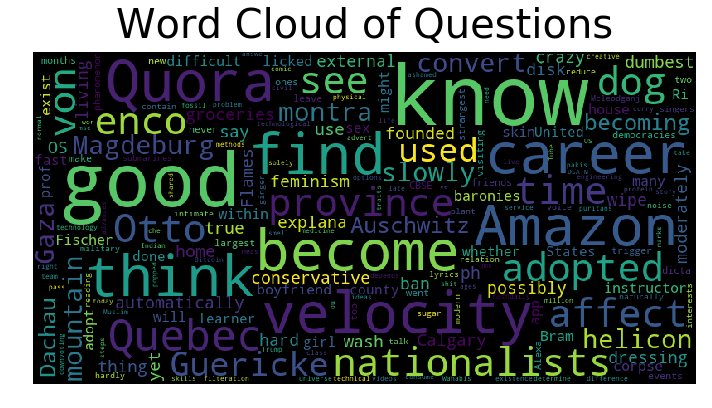

In [54]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,6), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train["question_text"], title="Word Cloud of Questions")

In [0]:
sincere_words = train[train.target==0].question_text.apply(lambda x: x.lower().split())

insincere_words = train[train.target==1].question_text.apply(lambda x: x.lower().split())



In [62]:
print('Number of sincere words',len(sincere_words))
print('Number of insincere words',len(insincere_words))

Number of sincere words 1225312
Number of insincere words 80810


## Number of wordsin the text

In [0]:
train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["question_text"].apply(lambda x: len(str(x).split()))


#printing the no of words in train
print('maximum of num_words in train',train["num_words"].max())
print('min of num_words in train',train["num_words"].min())

#printing the no of words in test
print("maximum of  num_words in test",test["num_words"].max())
print('min of num_words in train',test["num_words"].min())


maximum of num_words in train 134
min of num_words in train 1
maximum of  num_words in test 87
min of num_words in train 1


## Number of unique words in the text

In [0]:
train["num_unique_words"] = train["question_text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["question_text"].apply(lambda x: len(set(str(x).split())))

#printing the no of unique words in train
print('maximum of num_unique_words in train',train["num_unique_words"].max())
print('mean of num_unique_words in train',train["num_unique_words"].mean())

#printing the no of unique words in test
print("maximum of num_unique_words in test",test["num_unique_words"].max())
print('mean of num_unique_words in train',test["num_unique_words"].mean())

maximum of num_unique_words in train 96
mean of num_unique_words in train 12.135776749798257
maximum of num_unique_words in test 61
mean of num_unique_words in train 12.144194078859837


## Number of characters in the text 

In [0]:

train["num_chars"] = train["question_text"].apply(lambda x: len(str(x)))
test["num_chars"] = test["question_text"].apply(lambda x: len(str(x)))

#Printing the no of characters in the text
print('maximum of num_chars in train',train["num_chars"].max())
print("maximum of num_chars in test",test["num_chars"].max())

maximum of num_chars in train 1017
maximum of num_chars in test 991


## Number of stopwords in the text

In [0]:
train["num_stopwords"] = train["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#ptinting the no of stopwords
print('maximum of num_stopwords in train',train["num_stopwords"].max())
print("maximum of num_stopwords in test",test["num_stopwords"].max())

maximum of num_stopwords in train 56
maximum of num_stopwords in test 47


## Number of punctuations in the text

In [0]:

train["num_punctuations"] =train['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
test["num_punctuations"] =test['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

print('maximum of num_punctuations in train',train["num_punctuations"].max())
print("maximum of num_punctuations in test",test["num_punctuations"].max())

maximum of num_punctuations in train 411
maximum of num_punctuations in test 505


## Number of title case words in the text

In [0]:

train["num_words_upper"] = train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
test["num_words_upper"] = test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

print('maximum of num_words_upper in train',train["num_words_upper"].max())
print("maximum of num_words_upper in test",test["num_words_upper"].max())

maximum of num_words_upper in train 37
maximum of num_words_upper in test 39


## Number of title case words in the text

In [0]:

train["num_words_title"] = train["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
test["num_words_title"] = test["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

print('maximum of num_words_title in train',train["num_words_title"].max())
print("maximum of num_words_title in test",test["num_words_title"].max())

maximum of num_words_title in train 37
maximum of num_words_title in test 29


 ## Average length of the words in the text 

In [0]:

train["mean_word_len"] = train["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

print('mean_word_len in train',train["mean_word_len"].max())
print("mean_word_len in test",test["mean_word_len"].max())

mean_word_len in train 57.666666666666664
mean_word_len in test 329.6666666666667


We add some new feature to train and test data set now, print columns agains

In [0]:
#After adding some features into dataset
print(train.columns)

train.head(5)

Index(['qid', 'question_text', 'target', 'num_words', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'num_words_upper',
       'num_words_title', 'mean_word_len'],
      dtype='object')


,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,7,1,0,2,4.615385
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,9,2,0,1,4.125000
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,3,2,0,2,5.800000
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,3,1,0,4,5.444444
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,8,1,2,3,4.200000


<a id="64"></a> <br>
## 6-Data Visualization
**Data visualization**  is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

> * Two** important rules** for Data visualization:
>     1. Do not put too little information
>     1. Do not put too much information



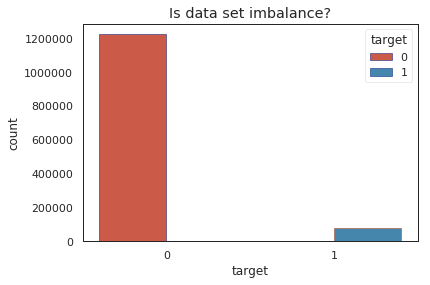

In [0]:
ax=sns.countplot(x='target',hue="target", data=train,edgecolor=sns.color_palette("dark", 3))

plt.title('Is data set imbalance?');

we can see that is is imbalanced dataset

<a id="642"></a> <br>
## 6.1  Pie Plot

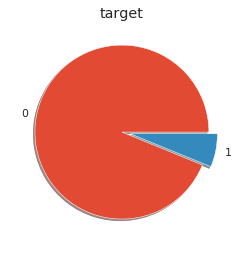

In [0]:

ax=train['target'].value_counts().plot.pie(explode=[0,0.1],shadow=True)
ax.set_title('target')
ax.set_ylabel('')
plt.show()

The insincere questions are less compare to sincere questions

<a id="643"></a> <br>
## 6.2 Histogram

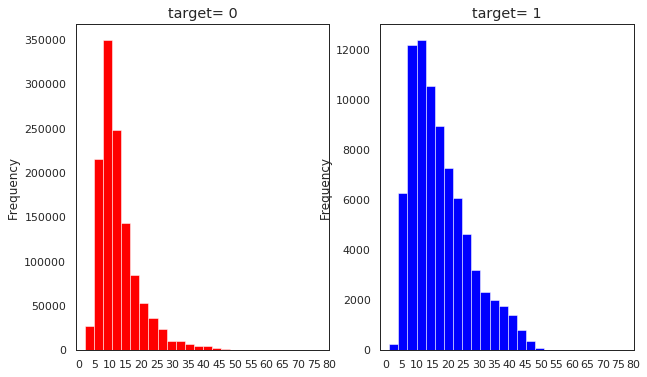

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,6))

train[train['target']==0].num_words.plot.hist(ax=ax[0],bins=20,edgecolor='white',color='red')

ax[0].set_title('target= 0')
x1=list(range(0,85,5))

ax[0].set_xticks(x1)
train[train['target']==1].num_words.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='white')

ax[1].set_title('target= 1')
x2=list(range(0,85,5))

ax[1].set_xticks(x2)
plt.show()

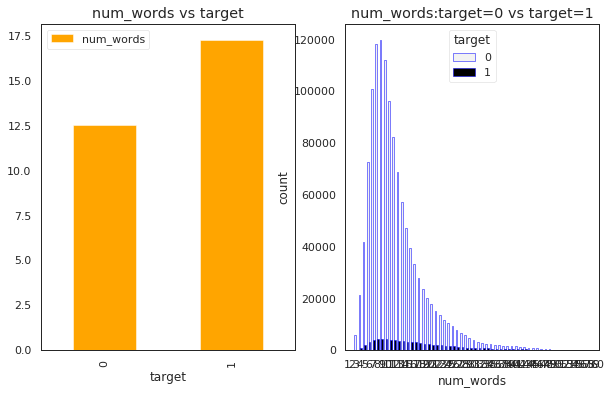

In [0]:
f,ax=plt.subplots(1,2,figsize=(10,6))

train[['target','num_words']].groupby(['target']).mean().plot.bar(ax=ax[0],color='orange')

ax[0].set_title('num_words vs target')
sns.countplot('num_words',hue='target',data=train,ax=ax[1],color='black',edgecolor='blue')

ax[1].set_title('num_words:target=0 vs target=1')
plt.show()

<Figure size 432x288 with 0 Axes>

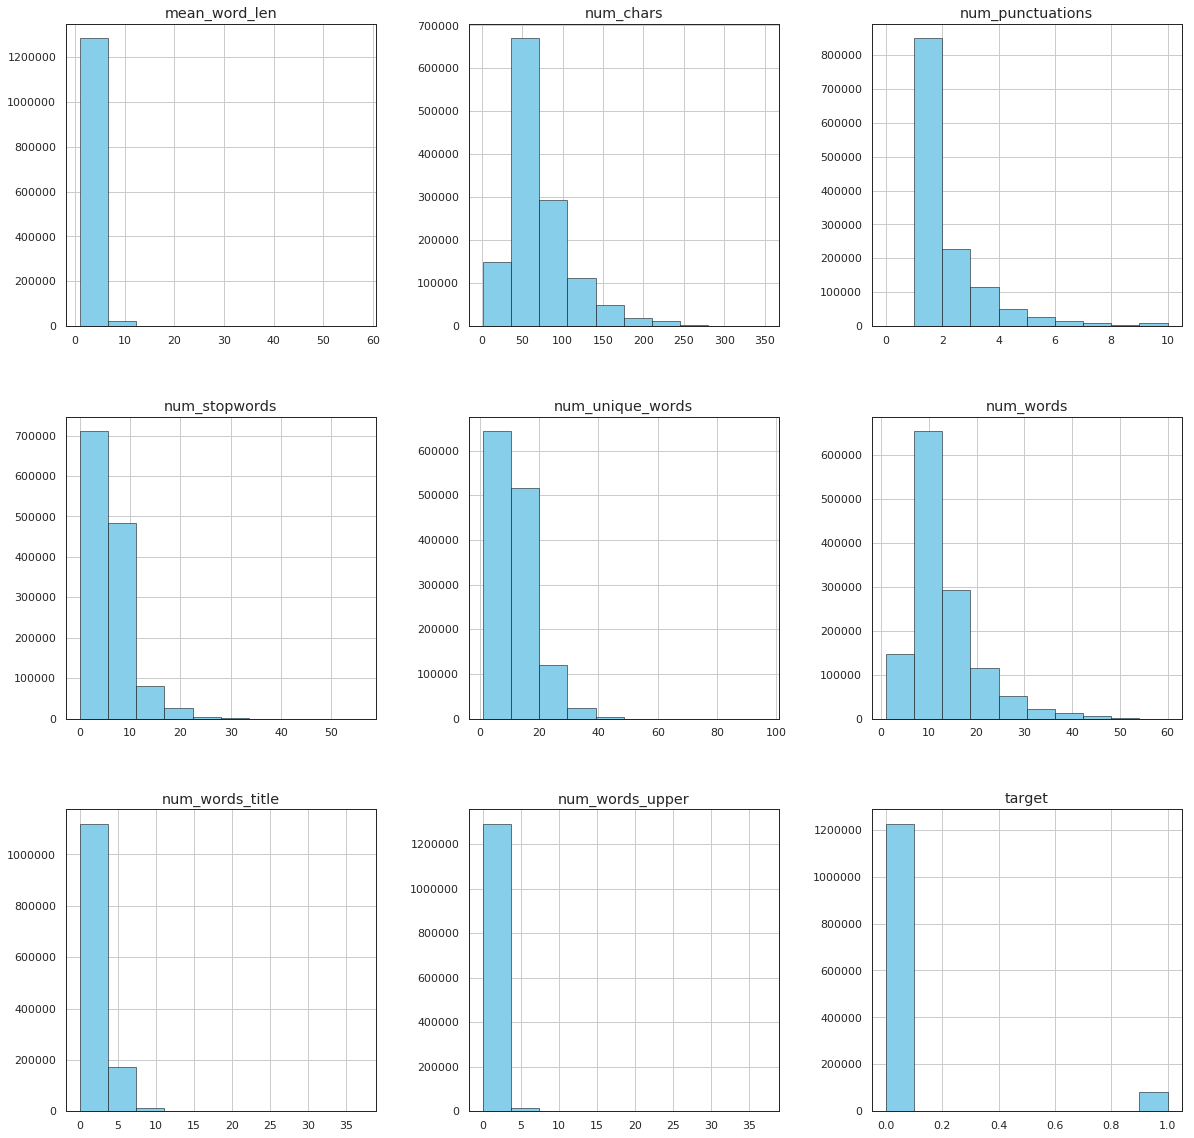

<Figure size 432x288 with 0 Axes>

In [0]:
# histograms
train.hist(figsize=(20,20),color='skyblue',edgecolor='black')
plt.figure()

<a id="644"></a> <br>
## 6.3 Violin Plot

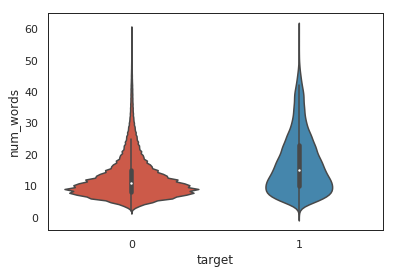

In [0]:
sns.violinplot(data=train,x="target", y="num_words"))

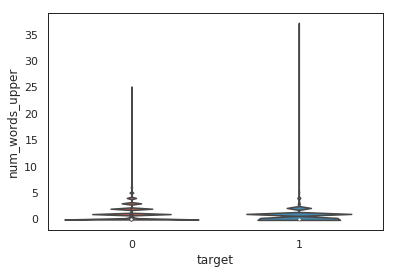

In [0]:
sns.violinplot(data=train,x="target", y="num_words_upper")

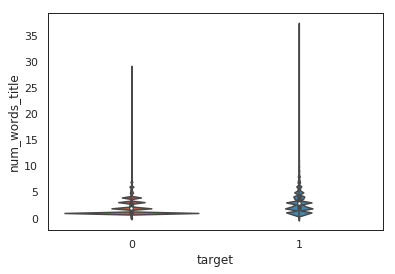

In [0]:
sns.violinplot(data=train,x="target", y="num_words_title")

<a id="645"></a> <br>
## 6.4 KdePlot

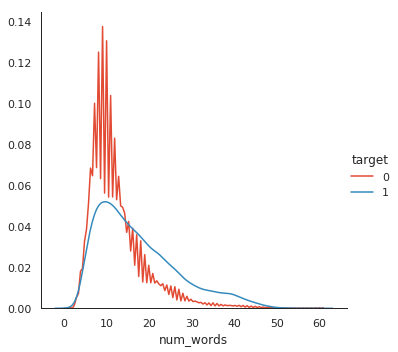

In [0]:
sns.FacetGrid(train, hue="target", size=5).map(sns.kdeplot, "num_words").add_legend()
plt.show()

<a id="646"></a> <br>
## 6.5 BoxPlots

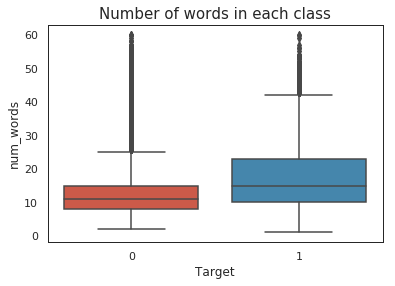

In [0]:
train['num_words'].loc[train['num_words']>60] = 60 #truncation for better visuals

axes= sns.boxplot(x='target', y='num_words', data=train)

axes.set_xlabel('Target', fontsize=12)

axes.set_title("Number of words in each class", fontsize=15)
plt.show()

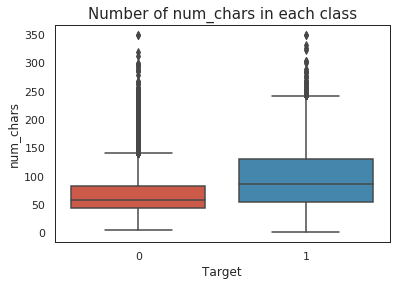

In [0]:
train['num_chars'].loc[train['num_chars']>350] = 350 #truncation for better visuals

axes= sns.boxplot(x='target', y='num_chars', data=train)
axes.set_xlabel('Target', fontsize=12)
axes.set_title("Number of num_chars in each class", fontsize=15)
plt.show()

We can see that the insincere questions have more number of words as well as characters compared to sincere questions. So this might be a useful feature in our model.

# 7.1 uni-gram

In [0]:
# Separating the targets from the feature we will work on
X = train.drop(['qid', 'target'], axis=1)
y = train['target']
X.shape, y.shape

((1306122, 9), (1306122,))

#### refer: https://www.kaggle.com/alaric81li215/eda-ml-for-beginners-by-a-beginner-bonus-on-qid

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [0]:
vectorizer = CountVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=1, random_state=42)

In [0]:
preprocessing_pipe = Pipeline([('vectorizer', vectorizer), ('svd', svd)])

In [0]:
# Building the latent semantic analysis dataframe for sincere and insincere questions

lsa_insincere = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere = pd.DataFrame(svd.components_)

topics_insincere.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

lsa_sincere = preprocessing_pipe.fit_transform(X[y==0]['question_text'])
topics_sincere = pd.DataFrame(svd.components_)

topics_sincere.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

topics_insincere.shape, topics_sincere.shape

((1, 37479), (1, 188697))

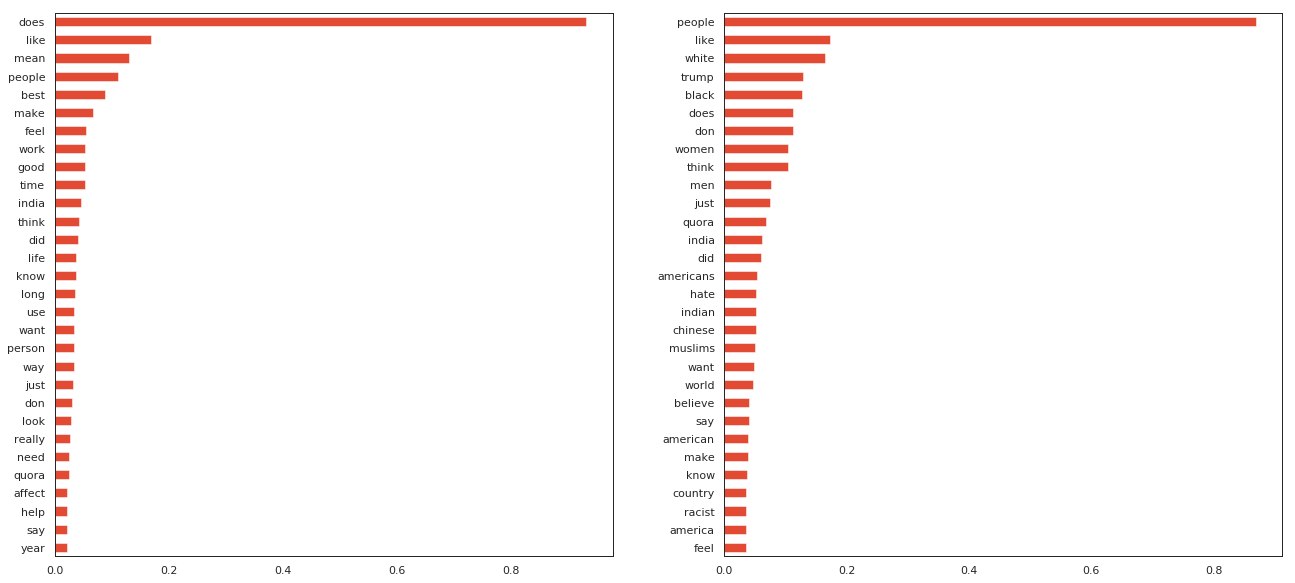

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(22,10));

topics_sincere.iloc[0].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=axes[0]);
topics_insincere.iloc[0].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=axes[1]);

Soooo here we are. Some words are obviously more common in insincere questions, like 'white' and 'black', but other words of importance in our LSA are shared by both sincere and insincere questions at the same level, like 'people'. Maybe working on bi-grams or tri-grams will help us define more precislely what an insincere question looks like. But before this, I wanted to try a Truncated SVD with 2 components, to see if I'll be able to link these two components to the results of my bi-grams study later.

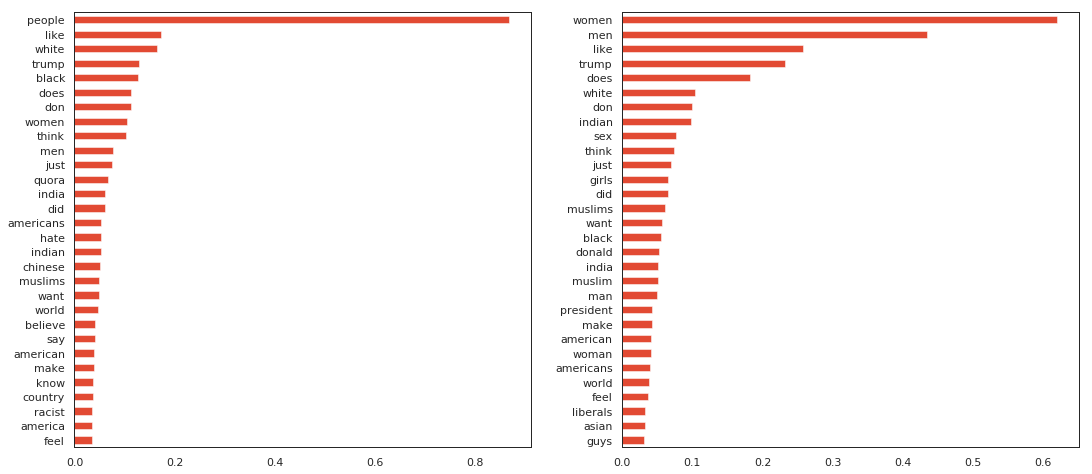

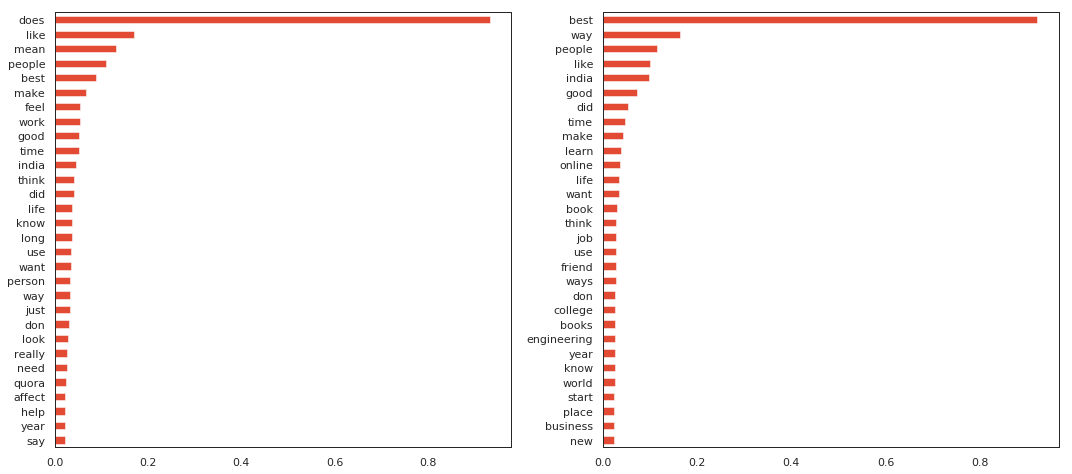

In [0]:
vectorizer = CountVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=2, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer', vectorizer), ('svd', svd)])

# Building the latent semantic analysis dataframe for sincere and insincere questions

lsa_insincere_2 = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_2 = pd.DataFrame(svd.components_)
topics_insincere_2.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()

lsa_sincere_2 = preprocessing_pipe.fit_transform(X[y==0]['question_text'])
topics_sincere_2 = pd.DataFrame(svd.components_)
topics_sincere_2.columns = preprocessing_pipe.named_steps['vectorizer'].get_feature_names()


fig_1, axes_1 = plt.subplots(1, 2, figsize=(18, 8))
for i, ax in enumerate(axes_1.flat):
    topics_insincere_2.iloc[i].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=ax)
    
fig_2, axes_2 = plt.subplots(1, 2, figsize=(18, 8))
for i, ax in enumerate(axes_2.flat):
    topics_sincere_2.iloc[i].sort_values(ascending=False)[:30].sort_values().plot.barh(ax=ax)

# 7.2 bi-gram

In [0]:
vectorizer_22 = CountVectorizer(stop_words='english', ngram_range=(2, 2))
svd_10c = TruncatedSVD(n_components=9, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer_22', vectorizer_22), ('svd_10c', svd_10c)])

# Building the latent semantic analysis dataframe for insincere questions

lsa_insincere_10c = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_10c = pd.DataFrame(svd_10c.components_)
topics_insincere_10c.columns = preprocessing_pipe.named_steps['vectorizer_22'].get_feature_names()

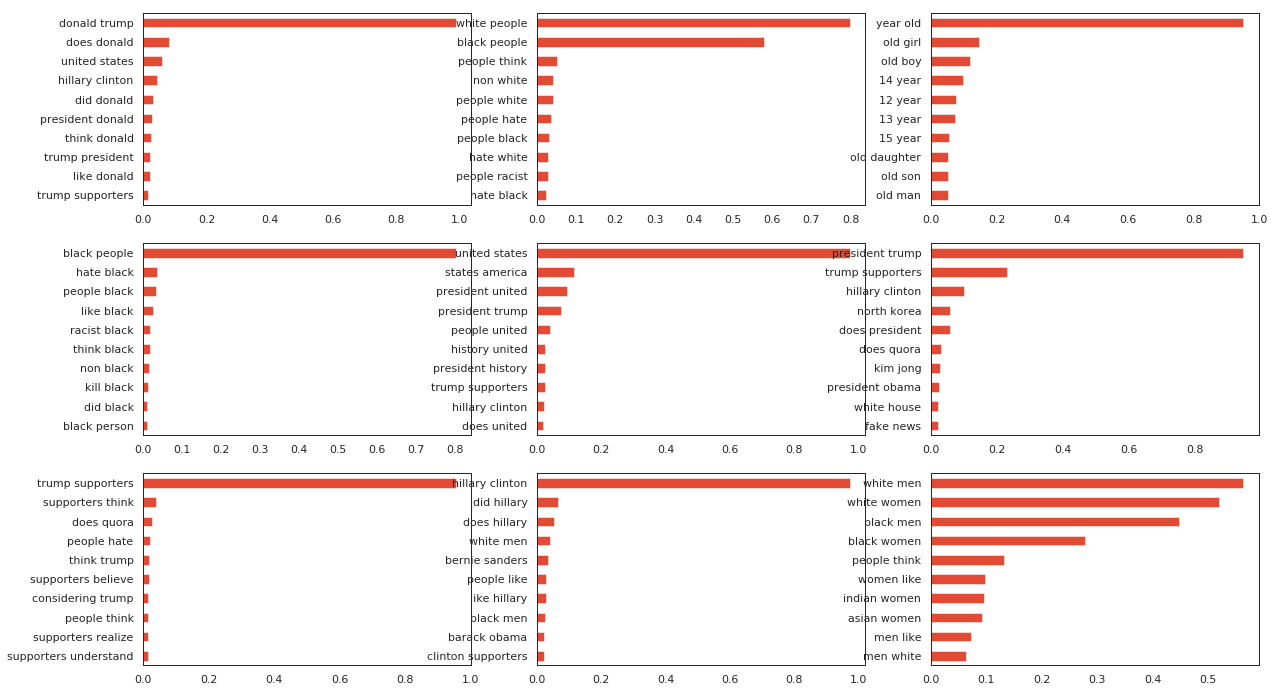

In [0]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
for i, ax in enumerate(axes.flat):
    topics_insincere_10c.iloc[i].sort_values(ascending=False)[:10].sort_values().plot.barh(ax=ax)

# 7.3 tri-gram

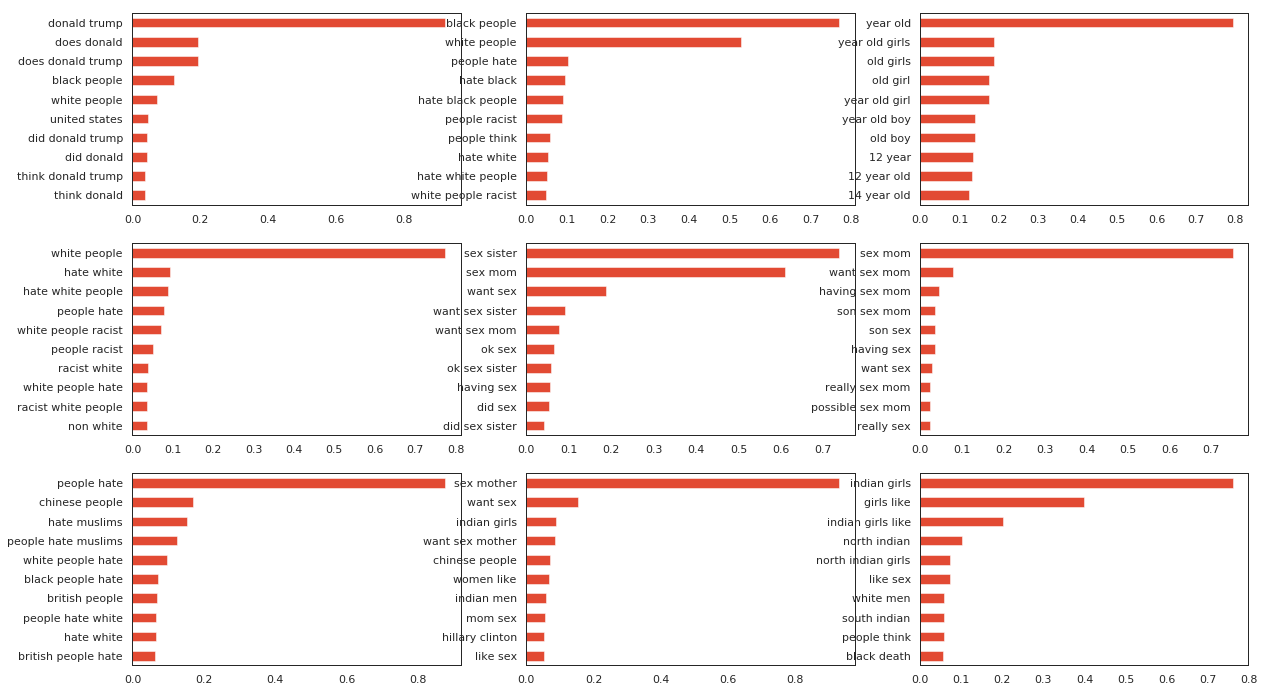

In [0]:
vectorizer_23 = TfidfVectorizer(stop_words='english', ngram_range=(2, 3))
svd_9c = TruncatedSVD(n_components=9, random_state=42)

preprocessing_pipe = Pipeline([('vectorizer_23', vectorizer_23), ('svd_9c', svd_9c)])

# Building the latent semantic analysis dataframe for insincere questions

lsa_insincere_9c = preprocessing_pipe.fit_transform(X[y==1]['question_text'])
topics_insincere_9c = pd.DataFrame(svd_9c.components_)
topics_insincere_9c.columns = preprocessing_pipe.named_steps['vectorizer_23'].get_feature_names()

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
for i, ax in enumerate(axes.flat):
    topics_insincere_9c.iloc[i].sort_values(ascending=False)[:10].sort_values().plot.barh(ax=ax)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers

In [71]:
model1 = Sequential()
model1.add(Embedding(max_features, embed_size, input_length=maxlen))
model1.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))

model1.add(GlobalMaxPool1D())
model1.add(Dropout(0.2))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          440320    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               